<a href="https://colab.research.google.com/github/asonidou/46705-Assignment-1/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("train_256286.csv")

In [ ]:
#Clean up column names (remove spaces/symbols, make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace('[^a-z0-9_]', '_', regex=True)
print("Columns:", df.columns.tolist())

Columns: ['timestamp', 'pv_mod1', 'pv_mod2', 'pv_mod3', 'demand', 'pv', 'price', 'temperature', 'pressure__hpa_', 'cloud_cover____', 'cloud_cover_low____', 'cloud_cover_mid____', 'cloud_cover_high____', 'wind_speed_10m__km_h_', 'shortwave_radiation__w_m__', 'direct_radiation__w_m__', 'diffuse_radiation__w_m__', 'direct_normal_irradiance__w_m__', 'daymax']


In [ ]:
df_july_1_15['hour'] = df_july_1_15['timestamp'].dt.hour

In [ ]:
#Find the PV generation of each day
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the radiation columns
radiation_cols = [
    'shortwave_radiation__w_m__',
    'direct_radiation__w_m__',
    'diffuse_radiation__w_m__',
    'direct_normal_irradiance__w_m__'
]

# Fill missing values in radiation columns with 0
df[radiation_cols] = df[radiation_cols].fillna(0)

df['PV_generation'] = (
    df['shortwave_radiation__w_m__'] +
    df['direct_radiation__w_m__'] +
    df['diffuse_radiation__w_m__'] +
    df['direct_normal_irradiance__w_m__']
)


#Extract date for daily aggregation
df['date'] = df['timestamp'].dt.date

# Drop the redundant PV_generation_W column if it exists
if 'PV_generation_W' in df.columns:
    df = df.drop(columns=['PV_generation_W'])

# Display the first few rows to show the impact of filling NaNs
display(df.head())

,timestamp,pv_mod1,pv_mod2,pv_mod3,demand,pv,price,temperature,pressure__hpa_,cloud_cover____,...,cloud_cover_mid____,cloud_cover_high____,wind_speed_10m__km_h_,shortwave_radiation__w_m__,direct_radiation__w_m__,diffuse_radiation__w_m__,direct_normal_irradiance__w_m__,daymax,PV_generation,date
0,2013-07-01 00:00:00+00:00,0.0,0.0,0.0,0.27,0.0,0.01605,13.5,1011.3,4,...,0,3,10.5,0.0,0,0,0.0,3.56,0.0,2013-07-01
1,2013-07-01 01:00:00+00:00,0.0,0.0,0.0,0.23,0.0,0.00095,13.2,1010.8,27,...,2,23,11.9,0.0,0,0,0.0,3.56,0.0,2013-07-01
2,2013-07-01 02:00:00+00:00,0.0,0.0,0.0,0.26,0.0,0.00060,13.1,1010.3,33,...,0,32,11.6,0.0,0,0,0.0,3.56,0.0,2013-07-01
3,2013-07-01 03:00:00+00:00,0.0,0.0,0.0,0.28,0.0,0.00046,13.0,1010.3,28,...,0,27,11.2,0.0,2,7,30.1,3.56,39.1,2013-07-01
4,2013-07-01 04:00:00+00:00,0.0,0.0,0.0,0.29,0.0,0.00046,13.8,1010.2,16,...,1,14,11.7,0.0,30,31,252.0,3.56,313.0,2013-07-01


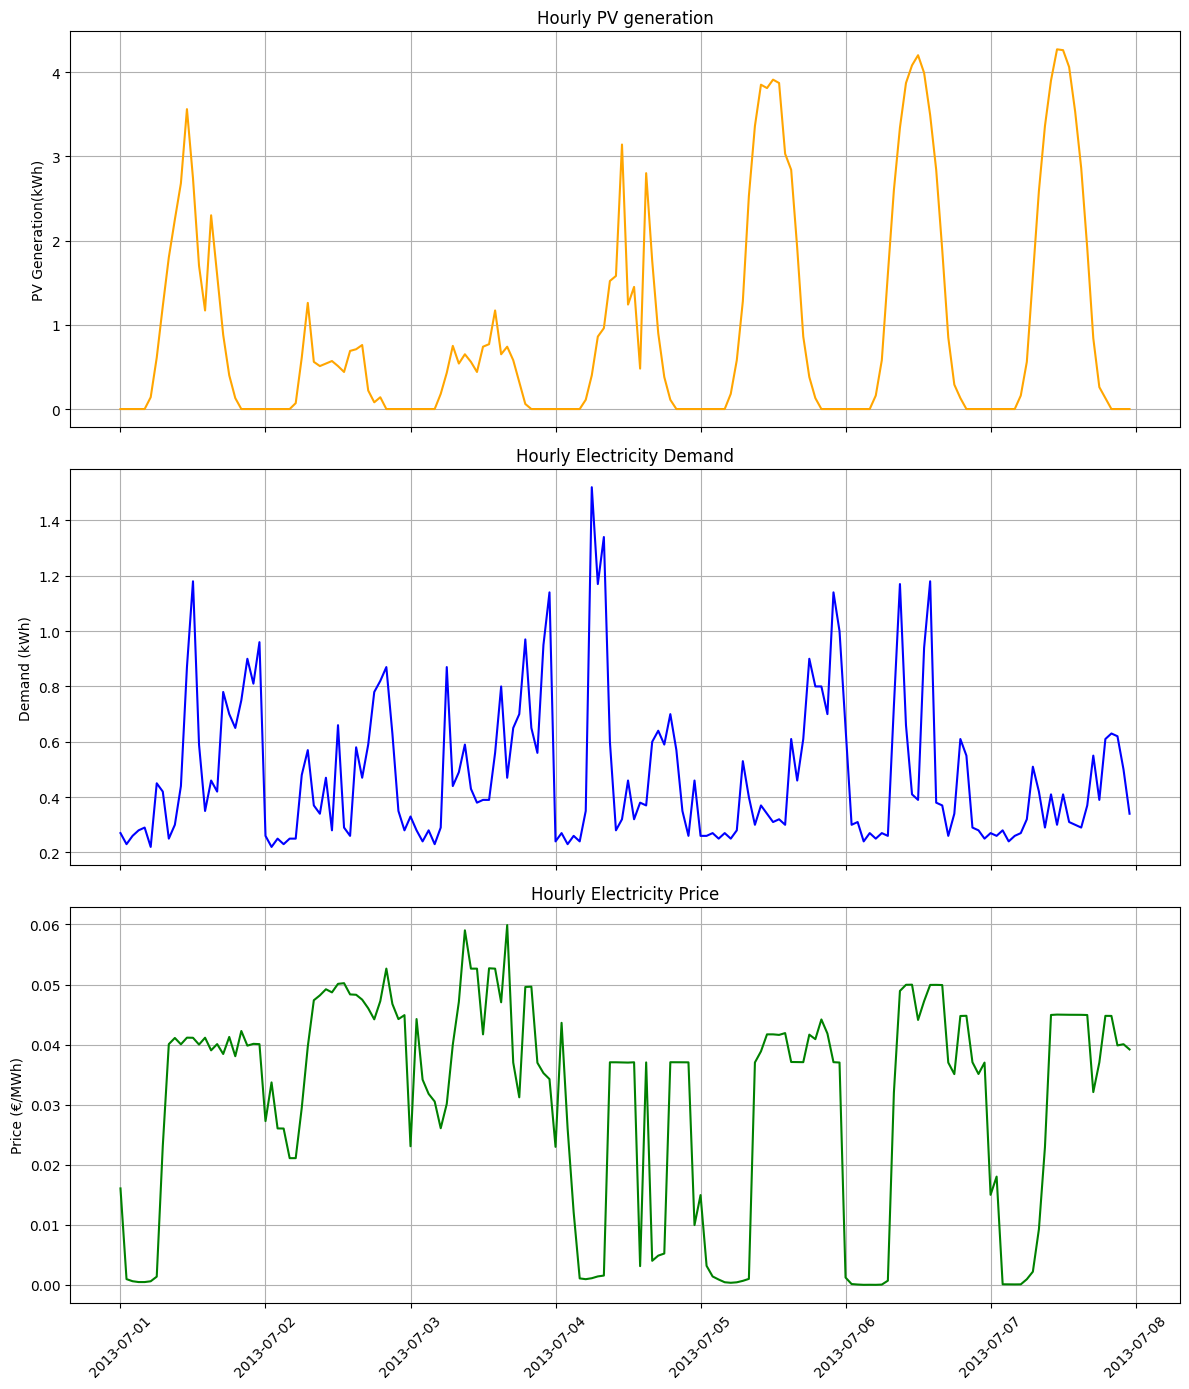

In [ ]:
#Plot daily results

# Create figure with 3 stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 14), sharex=True) # Changed back to 3 rows, 1 column, shared x-axis

# ----- 1️⃣ Electricity Price -----
axs[2].plot(df_july_1_15['timestamp'], df_july_1_15['price'], color='green', linestyle='-') # Swapped x and y back
axs[2].set_ylabel('Price (€/MWh)') # Swapped labels back
axs[2].set_title('Hourly Electricity Price')
axs[2].grid(True)


# ----- 3️⃣ Consumption / Demand -----
axs[0].plot(df_july_1_15['timestamp'], df_july_1_15['pv'], color='orange', linestyle='-') # Swapped x and y back
axs[0].set_ylabel('PV Generation(kWh)') # Swapped labels back
axs[0].set_title('Hourly PV generation')
axs[0].grid(True)

# ----- 3️⃣ Consumption / Demand -----
axs[1].plot(df_july_1_15['timestamp'], df_july_1_15['demand'], color='blue', linestyle='-') # Swapped x and y back
axs[1].set_ylabel('Demand (kWh)') # Swapped labels back
axs[1].set_title('Hourly Electricity Demand')
axs[1].grid(True)

# Rotate x-axis labels for all subplots (if needed, but timestamp should be fine)
plt.xticks(rotation=45) # Swapped x and y ticks rotation back
plt.tight_layout()
plt.show()

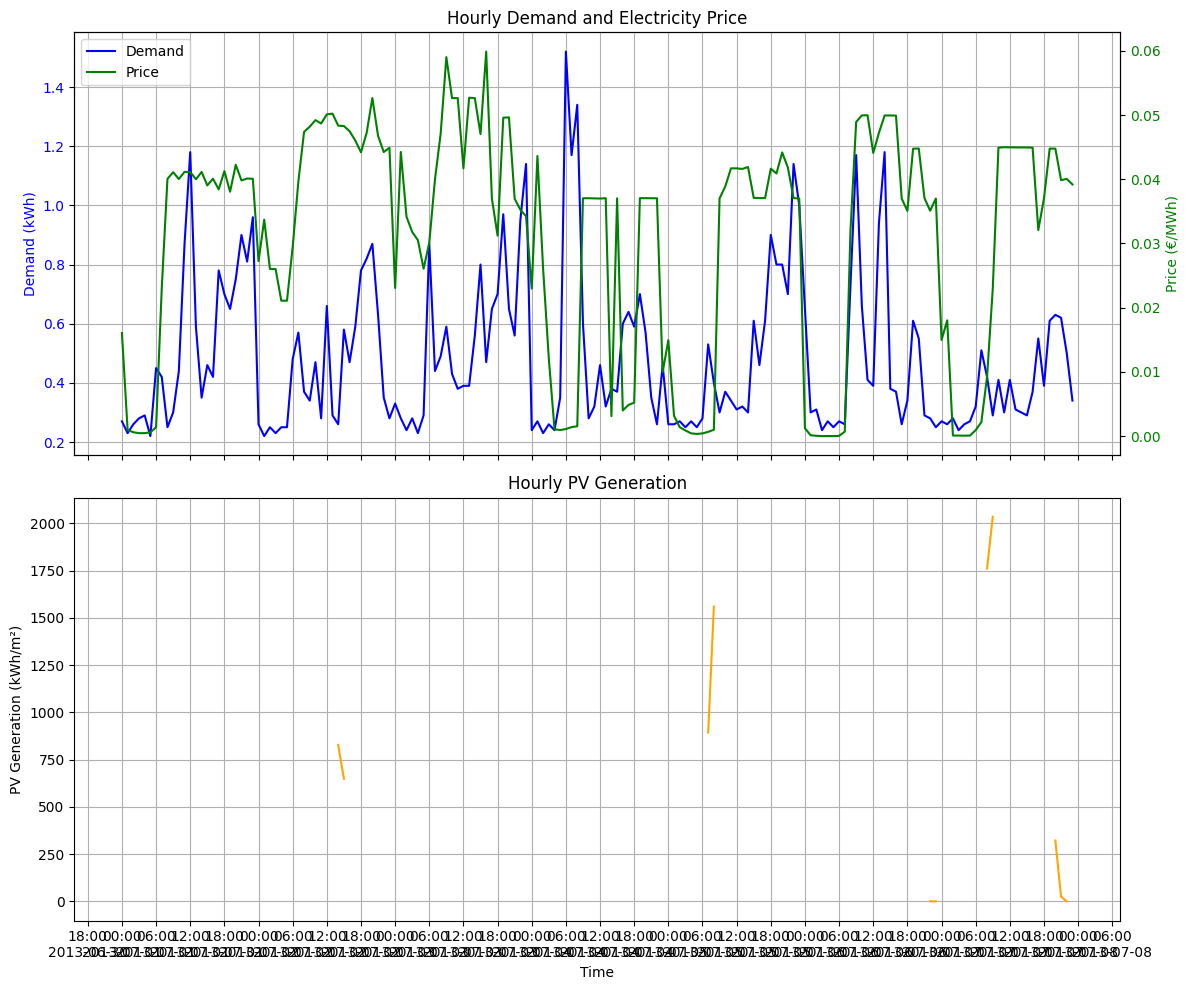

In [ ]:
# Create two graphs: one for demand and price, and one for PV generation

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # Create 2 subplots, sharing the x-axis

# ----- Graph 1: Demand and Price -----
ax1a = ax1.twinx() # Create a secondary y-axis for price

ax1.plot(df_july_1_15['timestamp'], df_july_1_15['demand'], color='blue', linestyle='-', label='Demand')
ax1.set_ylabel('Demand (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax1a.plot(df_july_1_15['timestamp'], df_july_1_15['price'], color='green', linestyle='-', label='Price')
ax1a.set_ylabel('Price (€/MWh)', color='green')
ax1a.tick_params(axis='y', labelcolor='green')

# Add legend to the first graph
lines1, labels1 = ax1.get_legend_handles_labels()
lines1a, labels1a = ax1a.get_legend_handles_labels()
ax1.legend(lines1 + lines1a, labels1 + labels1a, loc='upper left')
ax1.set_title('Hourly Demand and Electricity Price')

# Improve x-axis formatting for the first graph
import matplotlib.dates as mdates

# Set major ticks to be at 00:00, 06:00, 12:00, 18:00
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18], interval=1))
# Set minor ticks to be daily
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Format major ticks to show hour and date on separate lines
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:00\n%Y-%m-%d'))
# Format minor ticks to be invisible
ax1.xaxis.set_minor_formatter(mdates.DateFormatter(''))


# ----- Graph 2: PV Generation -----
ax2.plot(df_july_1_15['timestamp'], df_july_1_15['PV_generation'], color='orange', linestyle='-', label='PV Generation')
ax2.set_xlabel('Time')
ax2.set_ylabel('PV Generation (kWh/m²)')
ax2.set_title('Hourly PV Generation')
ax2.grid(True)


# Rotate x-axis labels
plt.xticks(rotation=45) # Set rotation to 45 for multi-line labels
plt.tight_layout()
plt.show()

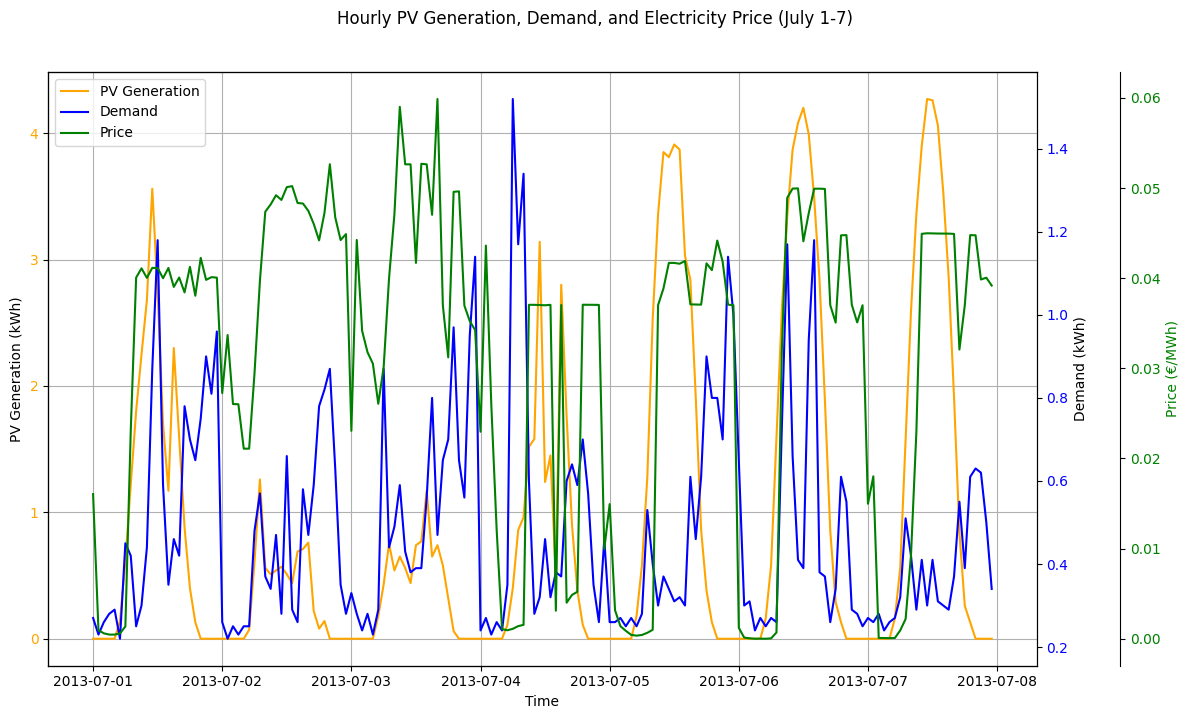

In [ ]:
# Plot PV generation, demand, and price on one graph with multiple y-axes

fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot PV Generation on the first y-axis
ax1.plot(df_july_1_15['timestamp'], df_july_1_15['PV_generation'], color='orange', linestyle='-', label='PV Generation')
ax1.set_xlabel('Time')
ax1.set_ylabel('PV Generation (kWh/m²)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True)

# Create a second y-axis for Demand
ax2 = ax1.twinx()
ax2.plot(df_july_1_15['timestamp'], df_july_1_15['demand'], color='blue', linestyle='-', label='Demand')
ax2.set_ylabel('Demand (kWh)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create a third y-axis for Price
ax3 = ax1.twinx()
# Offset the third y-axis to the right
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_july_1_15['timestamp'], df_july_1_15['price'], color='green', linestyle='-', label='Price')
ax3.set_ylabel('Price (€/MWh)', color='green')
ax3.tick_params(axis='y', labelcolor='green')


# Add a title and legends
fig.suptitle('Hourly PV Generation, Demand, and Electricity Price (July 1-7)', y=1.02) # Add suptitle and adjust its position
# Create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Improve x-axis formatting to show hours and dates
import matplotlib.dates as mdates

# Set major ticks to be at 00:00, 06:00, 12:00, 18:00
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18], interval=1))
# Set minor ticks to be daily
ax1.xaxis.set_minor_locator(mdates.DayLocator())


# Format major ticks to show hour and date on separate lines
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:00\n%Y-%m-%d'))
# Format minor ticks to be invisible
ax1.xaxis.set_minor_formatter(mdates.NullFormatter())


# Rotate x-axis labels
plt.xticks(rotation=0) # Set rotation to 0 for multi-line labels
plt.tight_layout()
plt.show()